## Download data MNIST từ Web

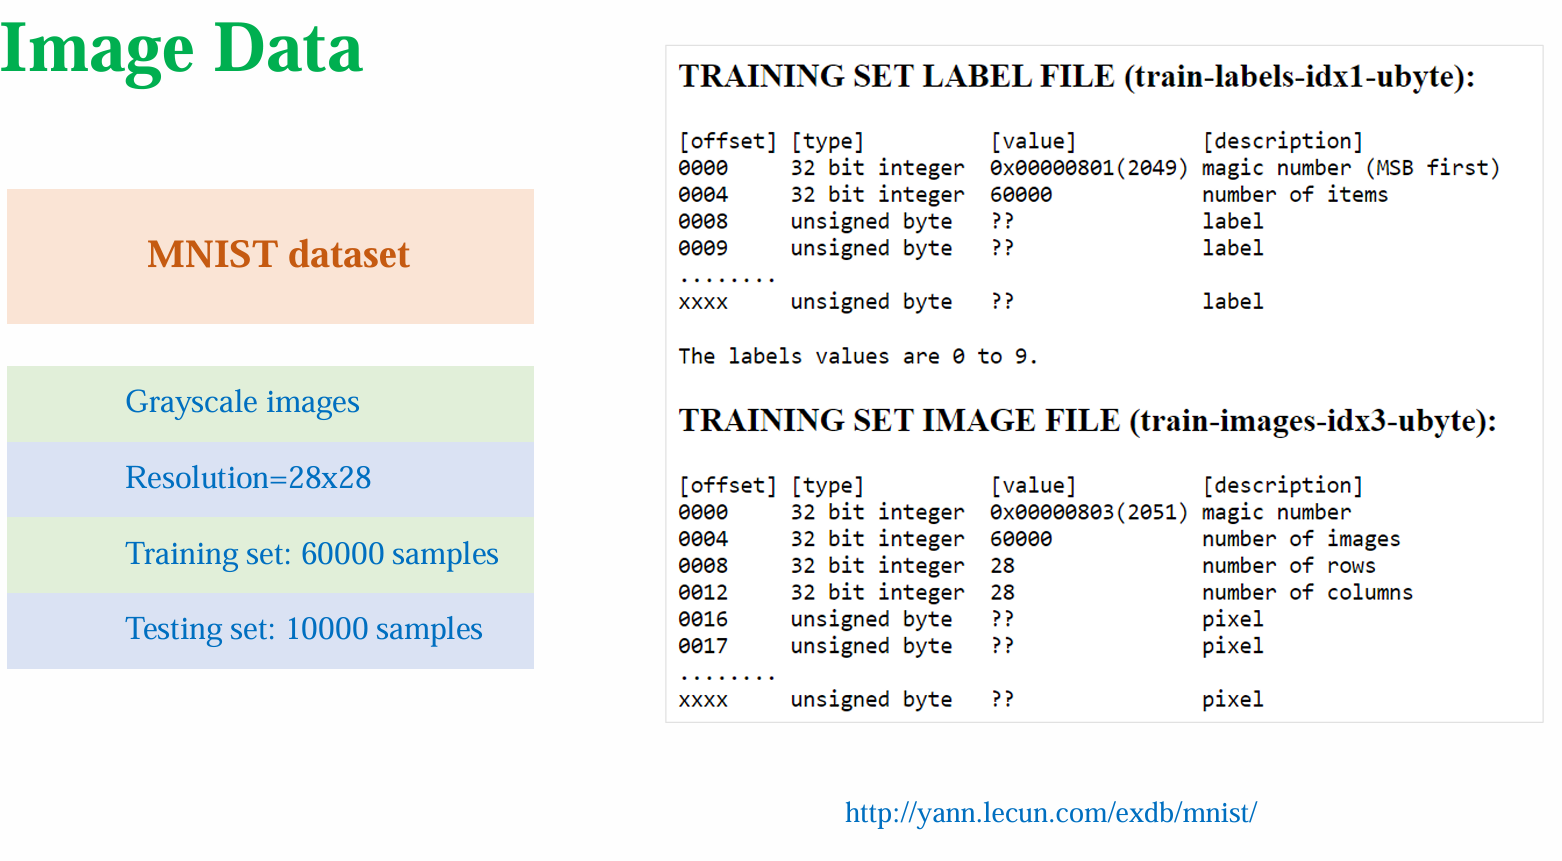

In [1]:
from urllib import request

filenames = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]

folder = 'data_fashion_mnist/'
base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
for name in filenames:
    print("Downloading " + name + "...")

    # Lưu vào folder data_fashion_mnist
    request.urlretrieve(base_url + name, folder + name)
print("Download complete.")

Download complete.


### Đọc dữ liệu

In [2]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)

# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

offset=16 nghĩa là bỏ qua 16 byte đầu tiên là những byte hiển thị thông tin dữ liệu

In [3]:
# Check data
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)


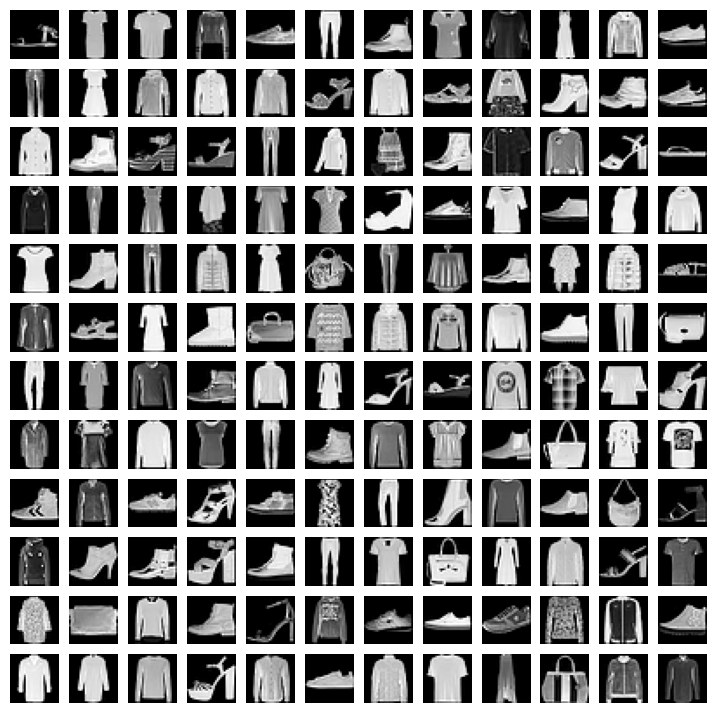

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

# Tạo danh sách 100 phần tử ngẫu nhiên từ X_train có 60000 phần tử
indices = list(np.random.randint(X_train.shape[0],size=144))

fig = plt.figure(figsize=(9, 9))
columns = 12
rows = 12
for i in range(1, columns*rows + 1):
    img = X_train[indices[i-1]].reshape(28,28) # lấy một hình ngẫu nhiên trong 60000 hình.
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

## Using Pytorch

Ta sử dụng thư viện torchvision.datasets. Thư viện này dành cho ảnh có chưa data FashionMNIST

`root='data'` chính là khai báo folder mà ta sẽ lưu giữ dữ liệu này.

`download=True` nghĩa là nó sẽ vô thư mục data để kiểm tra nếu mà chưa có thì sẽ download về.

`train=True` là sẽ lấy tập train ra. Ngược lại `train=False` thì sẽ lấy tập test ra.

In [5]:
from torchvision.datasets import FashionMNIST
trainset = FashionMNIST(root='data',
                        train=True,
                        download=True)

img, label = trainset[0]
print(type(img), label)

<class 'PIL.Image.Image'> 9


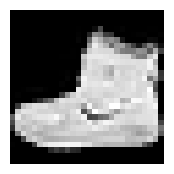

In [6]:
import matplotlib.pyplot as plt 

img, _ = trainset[0]

plt.figure(figsize=(2, 2))
plt.imshow(img, cmap='gray')
plt.axis('off') # Hide axis
plt.show()

Chuyển từ PIL sang tensor:

In [7]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data',
                        train=True,
                        download=True, transform=transform)

img, label = trainset[0]
print(type(img), label)
print(img.shape)

<class 'torch.Tensor'> 9
torch.Size([1, 28, 28])


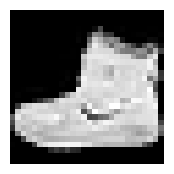

In [8]:
import matplotlib.pyplot as plt
import numpy as np 


img, _ = trainset[0]
np_img = img.numpy()
np_img = np.transpose(np_img, (1, 2, 0)) # sắp xếp lại thứ tự của các chiều theo H, W, C

plt.figure(figsize=(2, 2))
plt.imshow(np_img, cmap='gray')
plt.axis('off')
plt.show()

In [1]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data',
                        train=True,
                        download=True, 
                        transform=transform)

trainloader = DataLoader(trainset,
                         batch_size=1024,
                         num_workers=2, # số luồng để chạy song song. 
                         shuffle=True)  # bắt đầu một epoch là đảo dữ liệu lên.
print(len(trainloader))

59


In [10]:
# batch_size=1024
for i, (inputs, labels) in enumerate(trainloader, 0): # số 0 có ý nghĩa để hiển thị giá trị bắt đầu từ số 0
    print(f'Batch index {i} -- {inputs.shape} -- {labels.shape}')

Batch index 0 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 1 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 2 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 3 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 4 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 5 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 6 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 7 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 8 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 9 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 10 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 11 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 12 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 13 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 14 -- torch.Size([

### Có 2 cách để đặt flatten

Cách 1:

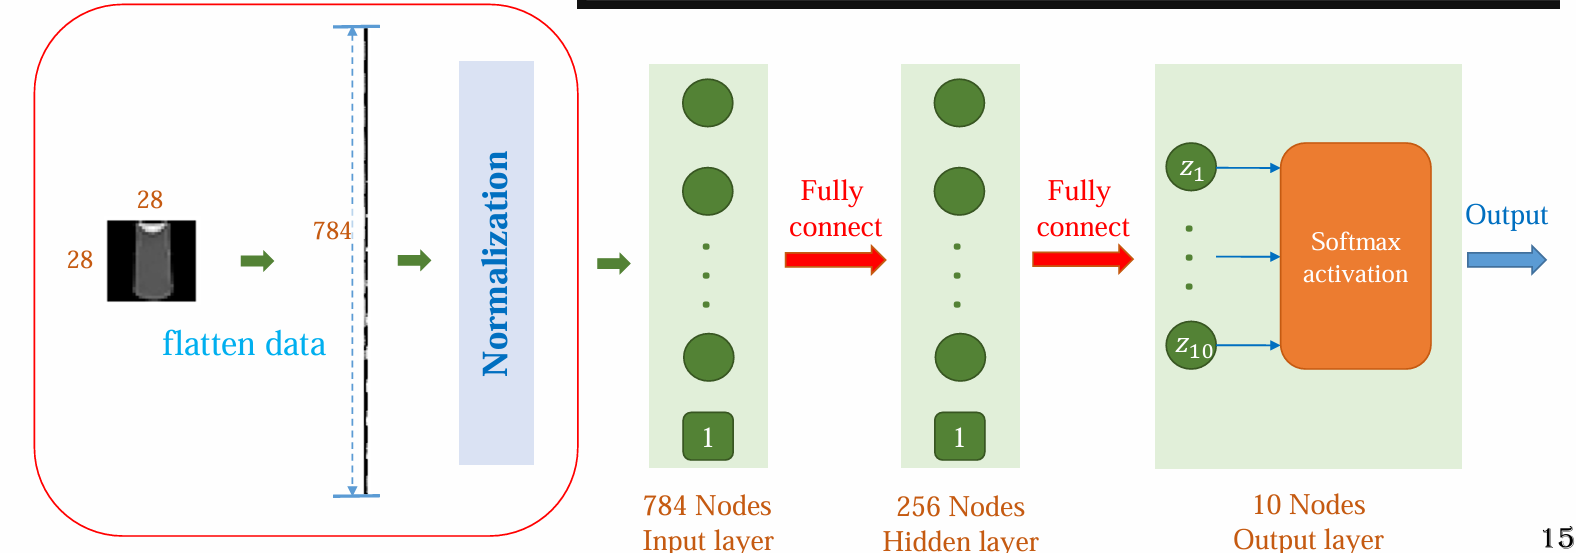

In [11]:
import torch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(torch.flatten)])
trainset = FashionMNIST(root='data',
                        train=True,
                        download=True, transform=transform)

img, label = trainset[0]
print(img.shape)

torch.Size([784])


Cách này thường không được dùng phổ biển

Cách 2:

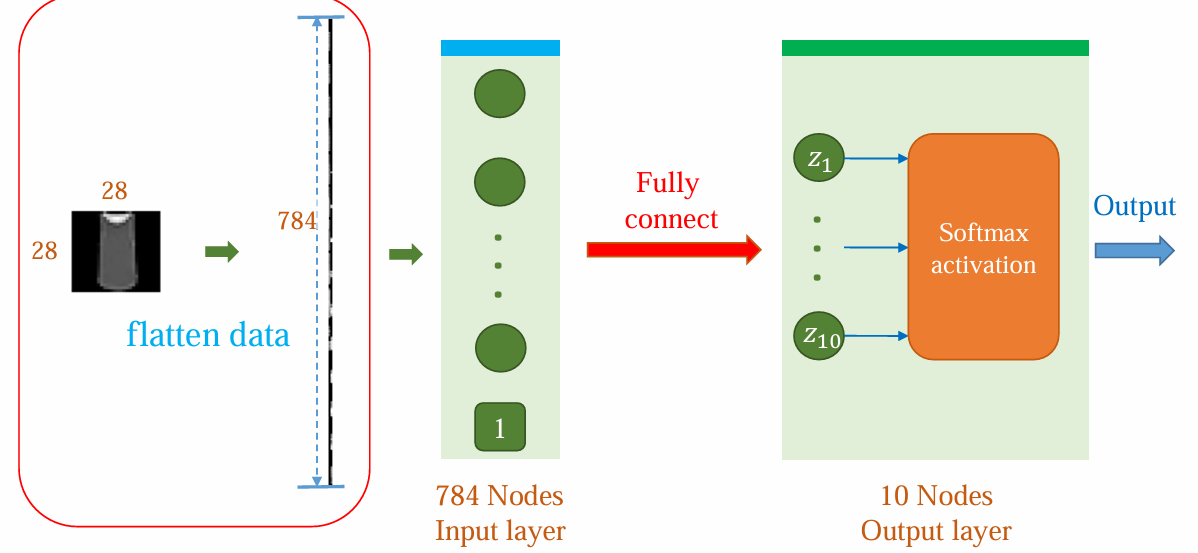

In [7]:
import torch.nn as nn 

model = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [8]:
import torch
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


In [9]:
import torch.optim as optim
import torch 

max_epoch = 100
train_losses = []

model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

# check if gpu is availabel
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# train
for epoch in range(max_epoch):
    running_loss = 0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradient
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

        # Backward pass and optimizer
        loss.backward()
        optimizer.step()
    epoch_loss = running_loss / (i + 1)

    train_losses.append(epoch_loss)

Loss: 0.5215738415718079


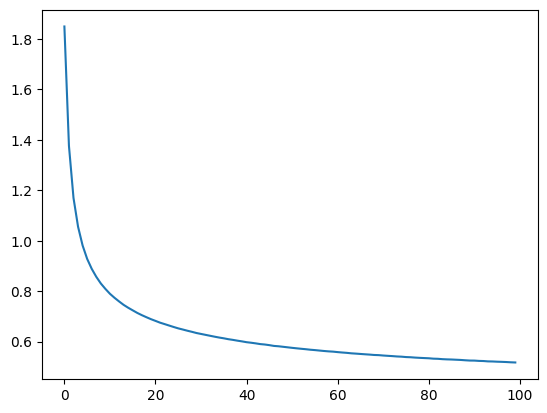

In [10]:
import matplotlib.pyplot as plt 

print(f'Loss: {loss}')
plt.plot(train_losses, label='train_losses')

Vì kết quả bị xấu nên ta cần phải normalize data thì kết quả cho ra tốt hơn. `ToTensor()` giúp tự normalize trả về từ 0 đến 1.

## Softmax Regression + Normalization

Chuyển normalize từ -1 đến 1.

In [20]:
import torchvision.transforms as  transforms
import torchvision

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),
                                                     (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='data',
                                             train=True,
                                             download=True,
                                             transform=transform)

In [22]:
import torch.optim as optim

max_epoch = 100

train_losses = []

model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

# check if gpu is availabel
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# train
for epoch in range(max_epoch):
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradient
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

        # Backward pass and optimizer
        loss.backward()
        optimizer.step()
    epoch_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}")
    train_losses.append(epoch_loss)

Epoch [1/100], Loss: 1.8319
Epoch [2/100], Loss: 1.3737
Epoch [3/100], Loss: 1.1704
Epoch [4/100], Loss: 1.0567
Epoch [5/100], Loss: 0.9828
Epoch [6/100], Loss: 0.9305
Epoch [7/100], Loss: 0.8903
Epoch [8/100], Loss: 0.8588
Epoch [9/100], Loss: 0.8328
Epoch [10/100], Loss: 0.8104
Epoch [11/100], Loss: 0.7915
Epoch [12/100], Loss: 0.7745
Epoch [13/100], Loss: 0.7602
Epoch [14/100], Loss: 0.7475
Epoch [15/100], Loss: 0.7355
Epoch [16/100], Loss: 0.7249
Epoch [17/100], Loss: 0.7152
Epoch [18/100], Loss: 0.7056
Epoch [19/100], Loss: 0.6980
Epoch [20/100], Loss: 0.6898
Epoch [21/100], Loss: 0.6828
Epoch [22/100], Loss: 0.6760
Epoch [23/100], Loss: 0.6700
Epoch [24/100], Loss: 0.6639
Epoch [25/100], Loss: 0.6582
Epoch [26/100], Loss: 0.6532
Epoch [27/100], Loss: 0.6481
Epoch [28/100], Loss: 0.6437
Epoch [29/100], Loss: 0.6393
Epoch [30/100], Loss: 0.6350
Epoch [31/100], Loss: 0.6313
Epoch [32/100], Loss: 0.6270
Epoch [33/100], Loss: 0.6231
Epoch [34/100], Loss: 0.6196
Epoch [35/100], Loss: 0

Loss: 0.44660529494285583


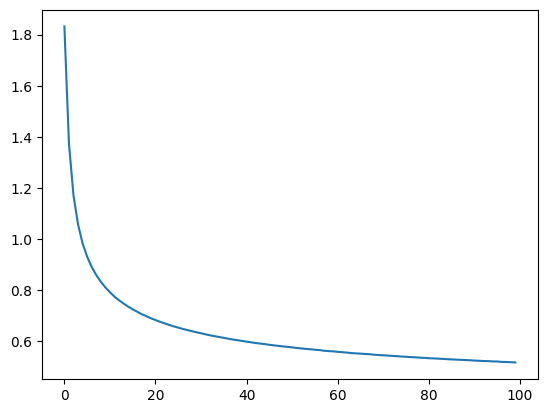

In [23]:
import matplotlib.pyplot as plt 

print(f'Loss: {loss}')
plt.plot(train_losses, label='train_losses')

# Multi Layers Perceptron

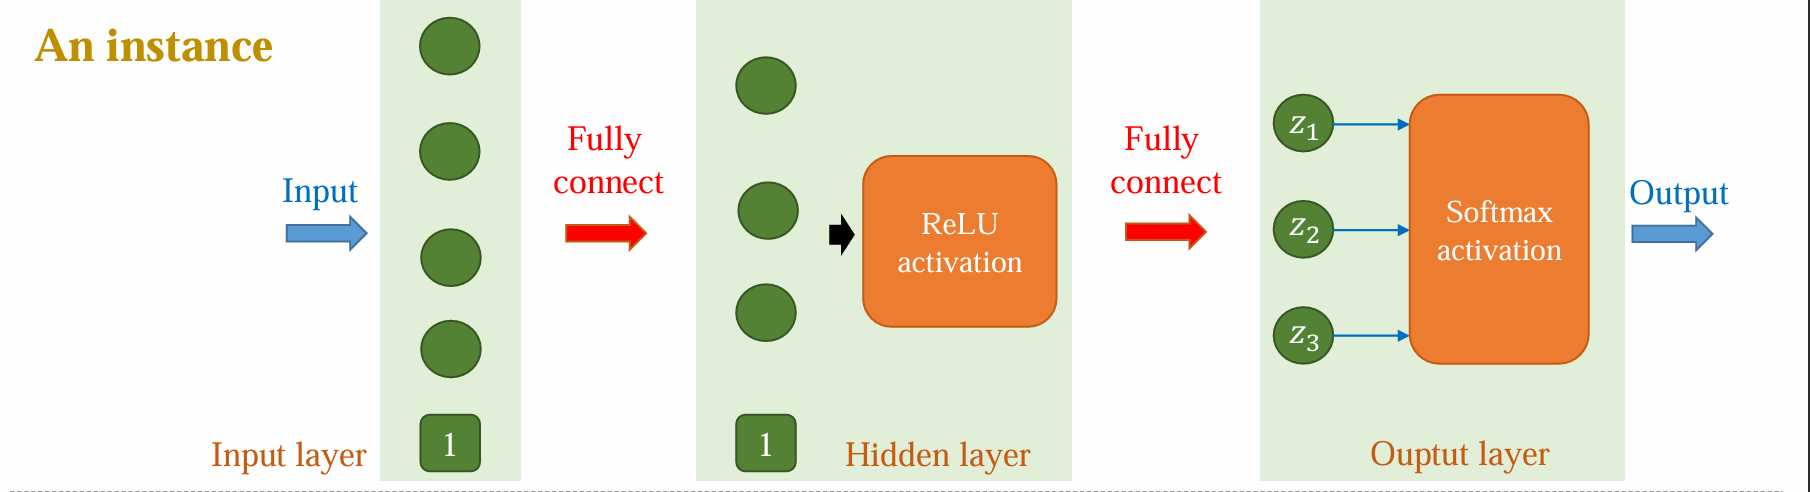

In [5]:
import torch.nn as nn
from torchsummary import summary

model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 3)
)

summary(model, input_size=(4,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]              15
              ReLU-2                    [-1, 3]               0
            Linear-3                    [-1, 3]              12
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


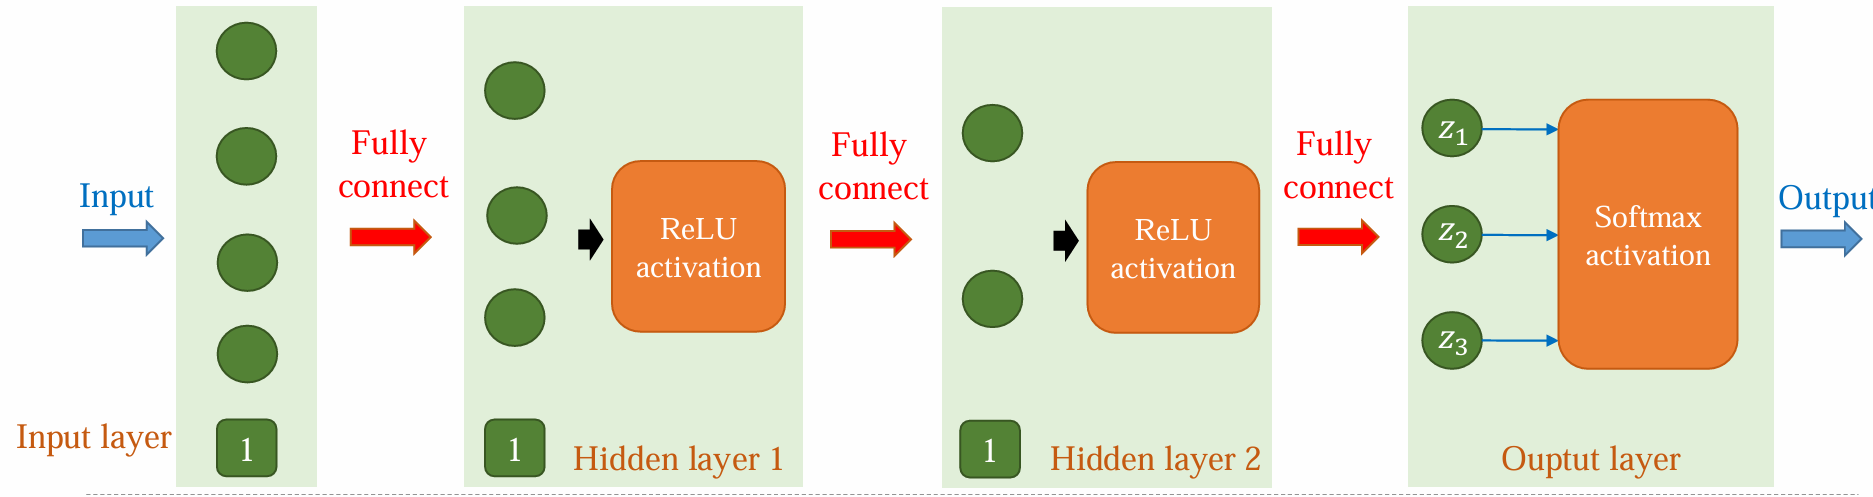

In [6]:
import torch.nn as nn
from torchsummary import summary

model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 3)
)

summary(model, input_size=(4,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]              15
              ReLU-2                    [-1, 3]               0
            Linear-3                    [-1, 2]               8
              ReLU-4                    [-1, 2]               0
            Linear-5                    [-1, 3]               9
Total params: 32
Trainable params: 32
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


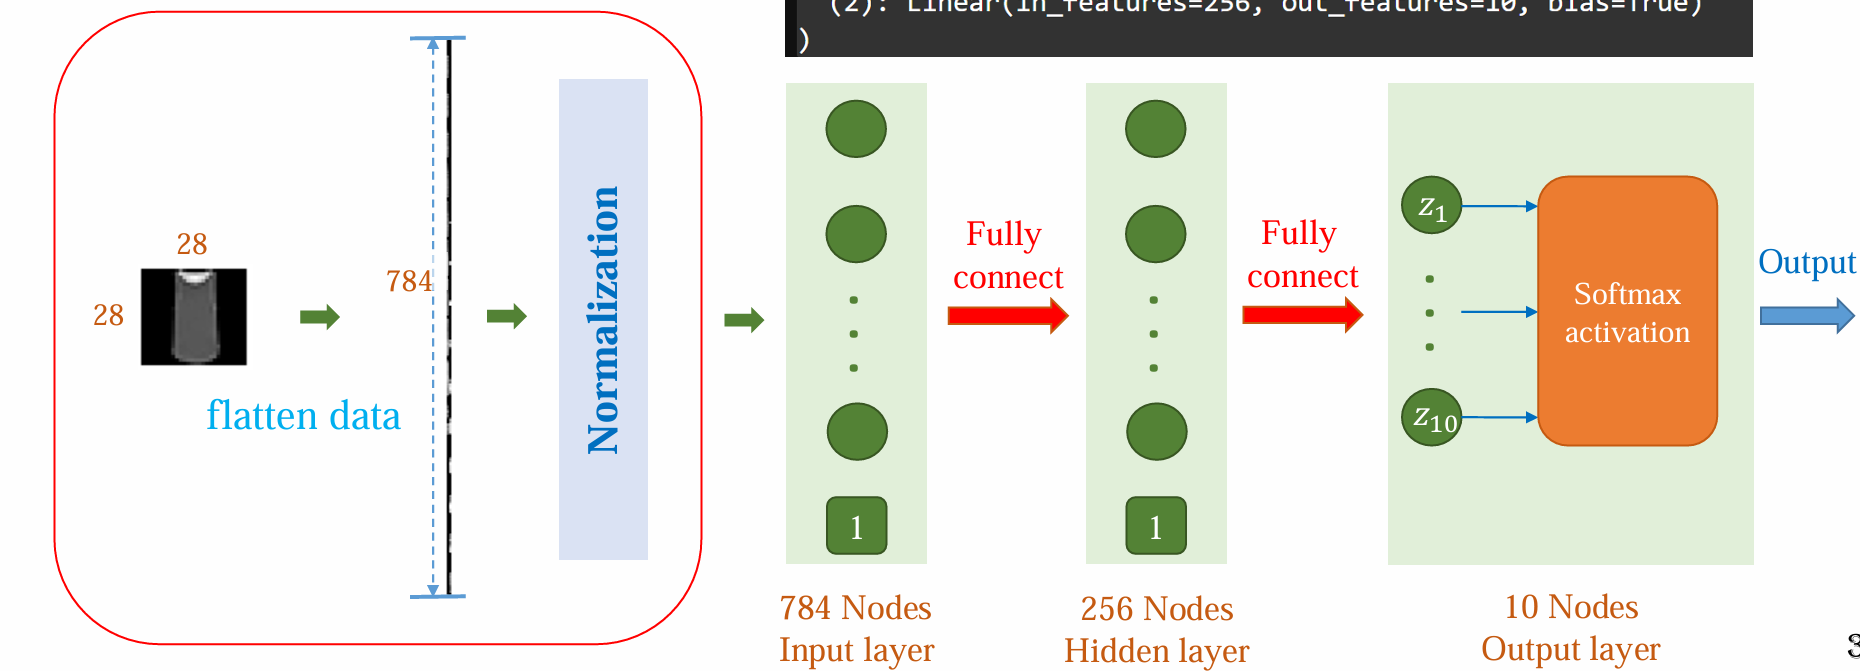

In [7]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


## Implement

### 1. Data preparation

In [1]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import torch.nn as nn
from torchsummary import summary
import torch.optim as optim 
import matplotlib.pyplot as plt 
import torch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),
                                                     (0.5,))])

trainset =  FashionMNIST(root='data',
                         train=True,
                         download=True,
                         transform=transform)
trainloader = DataLoader(trainset,
                         batch_size=64,
                         shuffle=True)

testset = FashionMNIST(root='data',
                       train=False,
                       download=True,
                       transform=transform)
testloader = DataLoader(testset,
                        batch_size=64,
                        shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 2. Model, loss and optimizer

In [2]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 3. Training

In [3]:
# Training the model
max_epoch = 5
for epoch in range(max_epoch):
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # move inputs  and labels to device
        inputs,labels = inputs.to(device), labels.to(device)

        # zero the parameter gradient
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # backward pass and optimizer
        loss.backward()
        optimizer.step()

    print(f'Epoch: [{epoch + 1} / {max_epoch}]')

Epoch: [1 / 5]
Epoch: [2 / 5]
Epoch: [3 / 5]
Epoch: [4 / 5]
Epoch: [5 / 5]


### 4. Inference

In [4]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        # Move inputs and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted==labels).sum().item()

accuracy = 100 * correct / total
print(f"accuracy: {accuracy}")

accuracy: 83.87


### Addition 1: Compute Training Loss and Accuracy

In [5]:
for epoch in range(5):
    running_loss = 0.0
    correct = 0     # to track number of correct of predictions
    total = 0       # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):
        # see comments from the previous example
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # accumulate loss
        running_loss += loss.item()

    epoech_accuracy = 100 * correct / total
    running_loss = running_loss / (i + 1)

### Addition 2: Compute Test Loss and Accuracy

In [6]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted==labels).sum().item()
    accuracy = 100 * correct / total
    return test_loss / len(testloader), accuracy

In [11]:
for epoch in range(5):
    running_loss = 0.0
    correct = 0     # to track number of correct of predictions
    total = 0       # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):
        # see comments from the previous example
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # accumulate loss
        running_loss += loss.item()

    epoch_accuracy = 100 * correct / total
    running_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model,
                                        testloader,
                                        criterion)
    
    print(f'Epoch: [{epoch + 1} / {max_epoch}], Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
    

Epoch: [1 / 5], Test Loss: 0.34132266955770507, Test Accuracy: 87.81
Epoch: [2 / 5], Test Loss: 0.3361136153055604, Test Accuracy: 88.07
Epoch: [3 / 5], Test Loss: 0.33547931112301577, Test Accuracy: 88.14
Epoch: [4 / 5], Test Loss: 0.337675331884129, Test Accuracy: 88.01
Epoch: [5 / 5], Test Loss: 0.33943820796954405, Test Accuracy: 87.93
